**Цель:**

Вспомнить и применить знания, полученные на протяжении всего курса. Получить полноценную работу, объединяющую в себе основные методики по работе с данными и алгоритмы машинного обучения.

**Описание задания:**

В лабораторной работе предлагается решить задачу классификации. Данные для выполнения работы можно скачать по ссылке, нажав на Data Folder. В датасете находится информация о флаге и базовых показателях страны. На основе доступной информации решается задача классификации стран по религии. Целевой признак мультиклассовый – religion. Остальные признаки описывают характерные черты флага и самой страны. Подробное описание признаков и их возможные значения можно прочесть на сайте.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Получаю данные и загружаю в рабочую среду**

In [ ]:
!wget 'https://archive.ics.uci.edu/static/public/40/flags.zip'

--2023-12-30 13:20:29--  https://archive.ics.uci.edu/static/public/40/flags.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘flags.zip.2’

flags.zip.2             [ <=>                ]   5.72K  --.-KB/s    in 0s      

2023-12-30 13:20:29 (84.0 MB/s) - ‘flags.zip.2’ saved [5862]



In [ ]:
!unzip flags.zip

Archive:  flags.zip
replace flag.data? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: flag.data               
replace flag.names? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: flag.names              
replace Index? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Index                   


In [ ]:
df_data = pd.read_csv('flag.data', header = None)
df_data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown


Вижу, что в данных отсутствуют названия признаков. Посмотрю другой файл, там приведено описание датасета

In [ ]:
df_names = pd.read_csv('flag.names', sep = ';', header = None)
df_names.values

array([['1. TItle: Flag database'],
       ['2. Source Information'],
       ['   -- Creators: Collected primarily from the "Collins Gem Guide to Flags":'],
       ['      Collins Publishers (1986).'],
       ['   -- Donor: Richard S. Forsyth '],
       ['             8 Grosvenor Avenue'],
       ['             Mapperley Park'],
       ['             Nottingham NG3 5DX'],
       ['             0602-621676'],
       ['   -- Date: 5/15/1990'],
       ['3. Past Usage:'],
       ["   -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide."],
       ['4. Relevant Information:'],
       ['   -- This data file contains details of various nations and their flags.'],
       ['      In this file the fields are separated by spaces (not commas).  With'],
       ['      this data you can try things like predicting the religion of a country'],
       ['      from its size and the colours in its flag.  '],
       ['   -- 10 attributes are numeric-valued.  The remainder are either 

Вижу, что названия признаков и пояснения к ним даются в пункте 7. Всего в датасете 30 признаков. Сформирую список названий признаков, чтобы затем дополнить файл .data и сформировать удобно интерпретируемый и читаемый датафрейм


In [ ]:
import re

In [ ]:
feature_names = []

for line in df_names[0].iloc[df_names.index[df_names[0] == '7. Attribute Information:'].to_list()[0]+1:df_names.index[df_names[0] == '8. Missing values: None'].to_list()[0]].values:
  string = str(line)

  pattern = r"\d.\s\w+\s"  # Шаблон для поиска названия признака
  match = re.search(pattern, string)
  if match:
      word = match.group()[3:]  # Получение найденного названия
      if '\t' in word:
        word = word[:-1]

      if ' ' in word:
        word = word[:-1]
      feature_names.append(word)


In [ ]:
df = pd.read_csv('flag.data', header = None, names = feature_names)
df

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown


Исходя из описания признаков, сформирую несколько категорий признаков для более удобной работы с ними в дальнейшем

In [ ]:
df.columns

Index(['name', 'landmass', 'zone', 'area', 'population', 'language',
       'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue',
       'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses',
       'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon',
       'animate', 'text', 'topleft', 'botright'],
      dtype='object')

In [ ]:
for_dummies = ['landmass','zone','language','mainhue','topleft','botright']
digital_categorials = ['red', 'green', 'blue', 'gold', 'white', 'black', 'crescent', 'triangle', 'icon', 'animate', 'text']
continuous = ['area', 'population', 'bars', 'stripes', 'colours', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars']

**2. Проведу первичный разведочный анализ данных**

Проверю на пропуски

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        194 non-null    object
 1   landmass    194 non-null    int64 
 2   zone        194 non-null    int64 
 3   area        194 non-null    int64 
 4   population  194 non-null    int64 
 5   language    194 non-null    int64 
 6   religion    194 non-null    int64 
 7   bars        194 non-null    int64 
 8   stripes     194 non-null    int64 
 9   colours     194 non-null    int64 
 10  red         194 non-null    int64 
 11  green       194 non-null    int64 
 12  blue        194 non-null    int64 
 13  gold        194 non-null    int64 
 14  white       194 non-null    int64 
 15  black       194 non-null    int64 
 16  orange      194 non-null    int64 
 17  mainhue     194 non-null    object
 18  circles     194 non-null    int64 
 19  crosses     194 non-null    int64 
 20  saltires  

Пропусков нет, можно идти дальше

Видно, что есть несколько некатегориальных числовых признаков - area и population, значения которых могут быть нулевыми. Посмотрю на них подробнее.

In [ ]:
df[df['population'] == 0]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
12,Bahamas,1,4,19,0,1,1,0,3,3,...,0,0,0,0,1,0,0,0,blue,blue
13,Bahrain,5,1,1,0,8,2,0,0,2,...,0,0,0,0,0,0,0,0,white,red
15,Barbados,1,4,0,0,1,1,3,0,3,...,0,0,0,0,0,1,0,0,blue,blue
17,Belize,1,4,23,0,1,1,0,2,8,...,0,0,0,0,0,1,1,1,red,red
19,Bermuda,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,0,white,red
24,British-Virgin-Isles,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,1,white,blue


Бросается в глаза тот факт, что страны якобы с отсутствующим населением очень часто также имеют и нулевую площадь. В описании к этим признакам сказано, что значения признаков площади и населения округляются до тысяч квадратных километров и миллионов человек соответственно. А это значит, что население и площадь этих стран меньше 1 млн и 1000 кв. км соответственно. При этом остальные признаки у них заполнены, значит, какую-то информацию они содержат. Более того, мы еще не знаем, насколько важны для модели население и площадь страны. Ну и наконец, в датасете очень мало объектов (194), чтобы еще удалять порядка 50-60 из них, что составляет примерно 30% от общего списка, это очень много.

Поэтому оставляю эти страны в датафрейме

**3. Сделаю несколько визуализаций**

Сначала посмотрю, как связаны между собой площадь и население

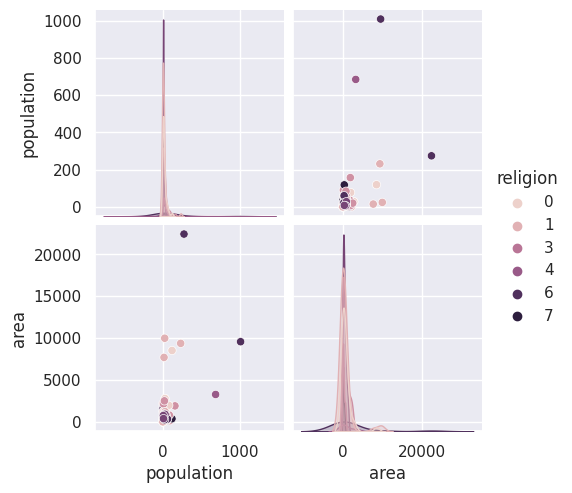

In [ ]:
sns.set(rc={'figure.figsize':(12,9)})
sns.pairplot(data = df, vars = ['population','area'], hue = 'religion');


Несмотря на большое количество точек вблизи 0 по шкале населения, можно увидеть положительную корреляцию

Зная, что зеленый цвет является особым у мусульман, предположу, что он может каким-то образом определять религию страны. Построю визуализацию распределения флагов, содержащих зеленый цвет и аналогичное распределение для стран, где нет зеленого

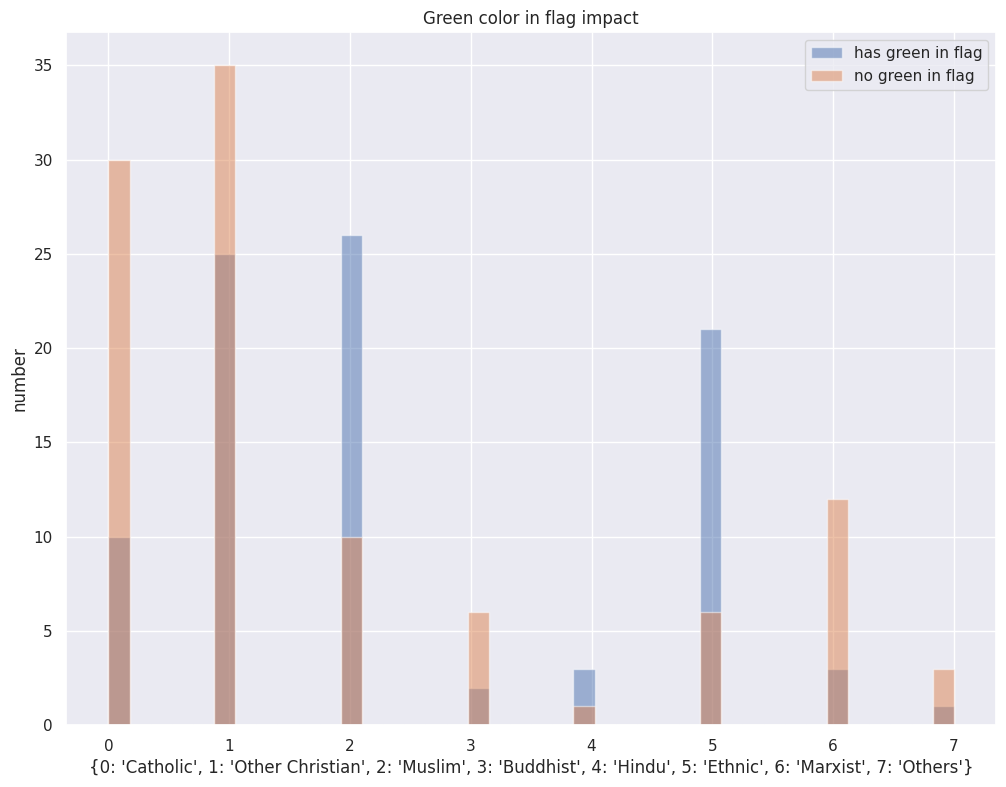

In [ ]:
plt.figure(figsize=(12,9))
plt.hist(df[df['green'] == 1]['religion'], bins = 40, alpha = 0.5)
plt.hist(df[df['green'] != 1]['religion'], bins = 40, alpha = 0.5)

religion_dict = {0:'Catholic',
                 1:'Other Christian',
                 2:'Muslim',
                 3:'Buddhist',
                 4:'Hindu',
                 5:'Ethnic',
                 6:'Marxist',
                 7:'Others'}
#['Catholic', 'Other Christian', 'Muslim', 'Buddhist', 'Hindu','Ethnic', 'Marxist', 'Others']
plt.xlabel(religion_dict)
plt.ylabel('number')
plt.title('Green color in flag impact')
plt.legend(['has green in flag', 'no green in flag'])


plt.show()

Вижу, что зеленый цвет во флаге является достаточно важным признаком для определения религии. Практически нет религий, где зеленого цвета было бы примерно поравну с остальными - он либо преобладает, как для мусульманских, индуистских и этнических стран, либо наоборот редко встречается, как в католических, буддистских и марксистских странах

Построю распределение флагов по религиям

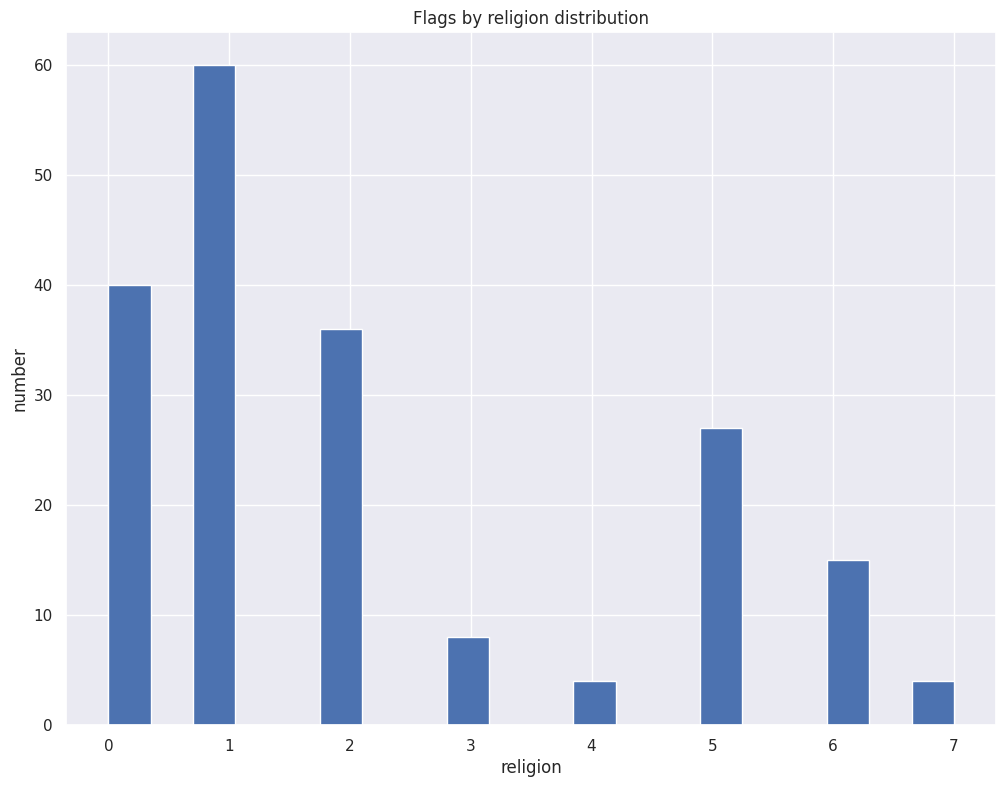

In [ ]:
plt.figure(figsize=(12,9))
plt.hist(df['religion'], bins = 20)
plt.xlabel('religion')
plt.ylabel('number')
plt.title('Flags by religion distribution')

plt.show()

Вижу, что датасет по классам не сбалансирован. Это может быть проблемой при дальнейшем обучении моделей

**4. Построю корреляционную матрицу**

<ipython-input-16-67d748be5194>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


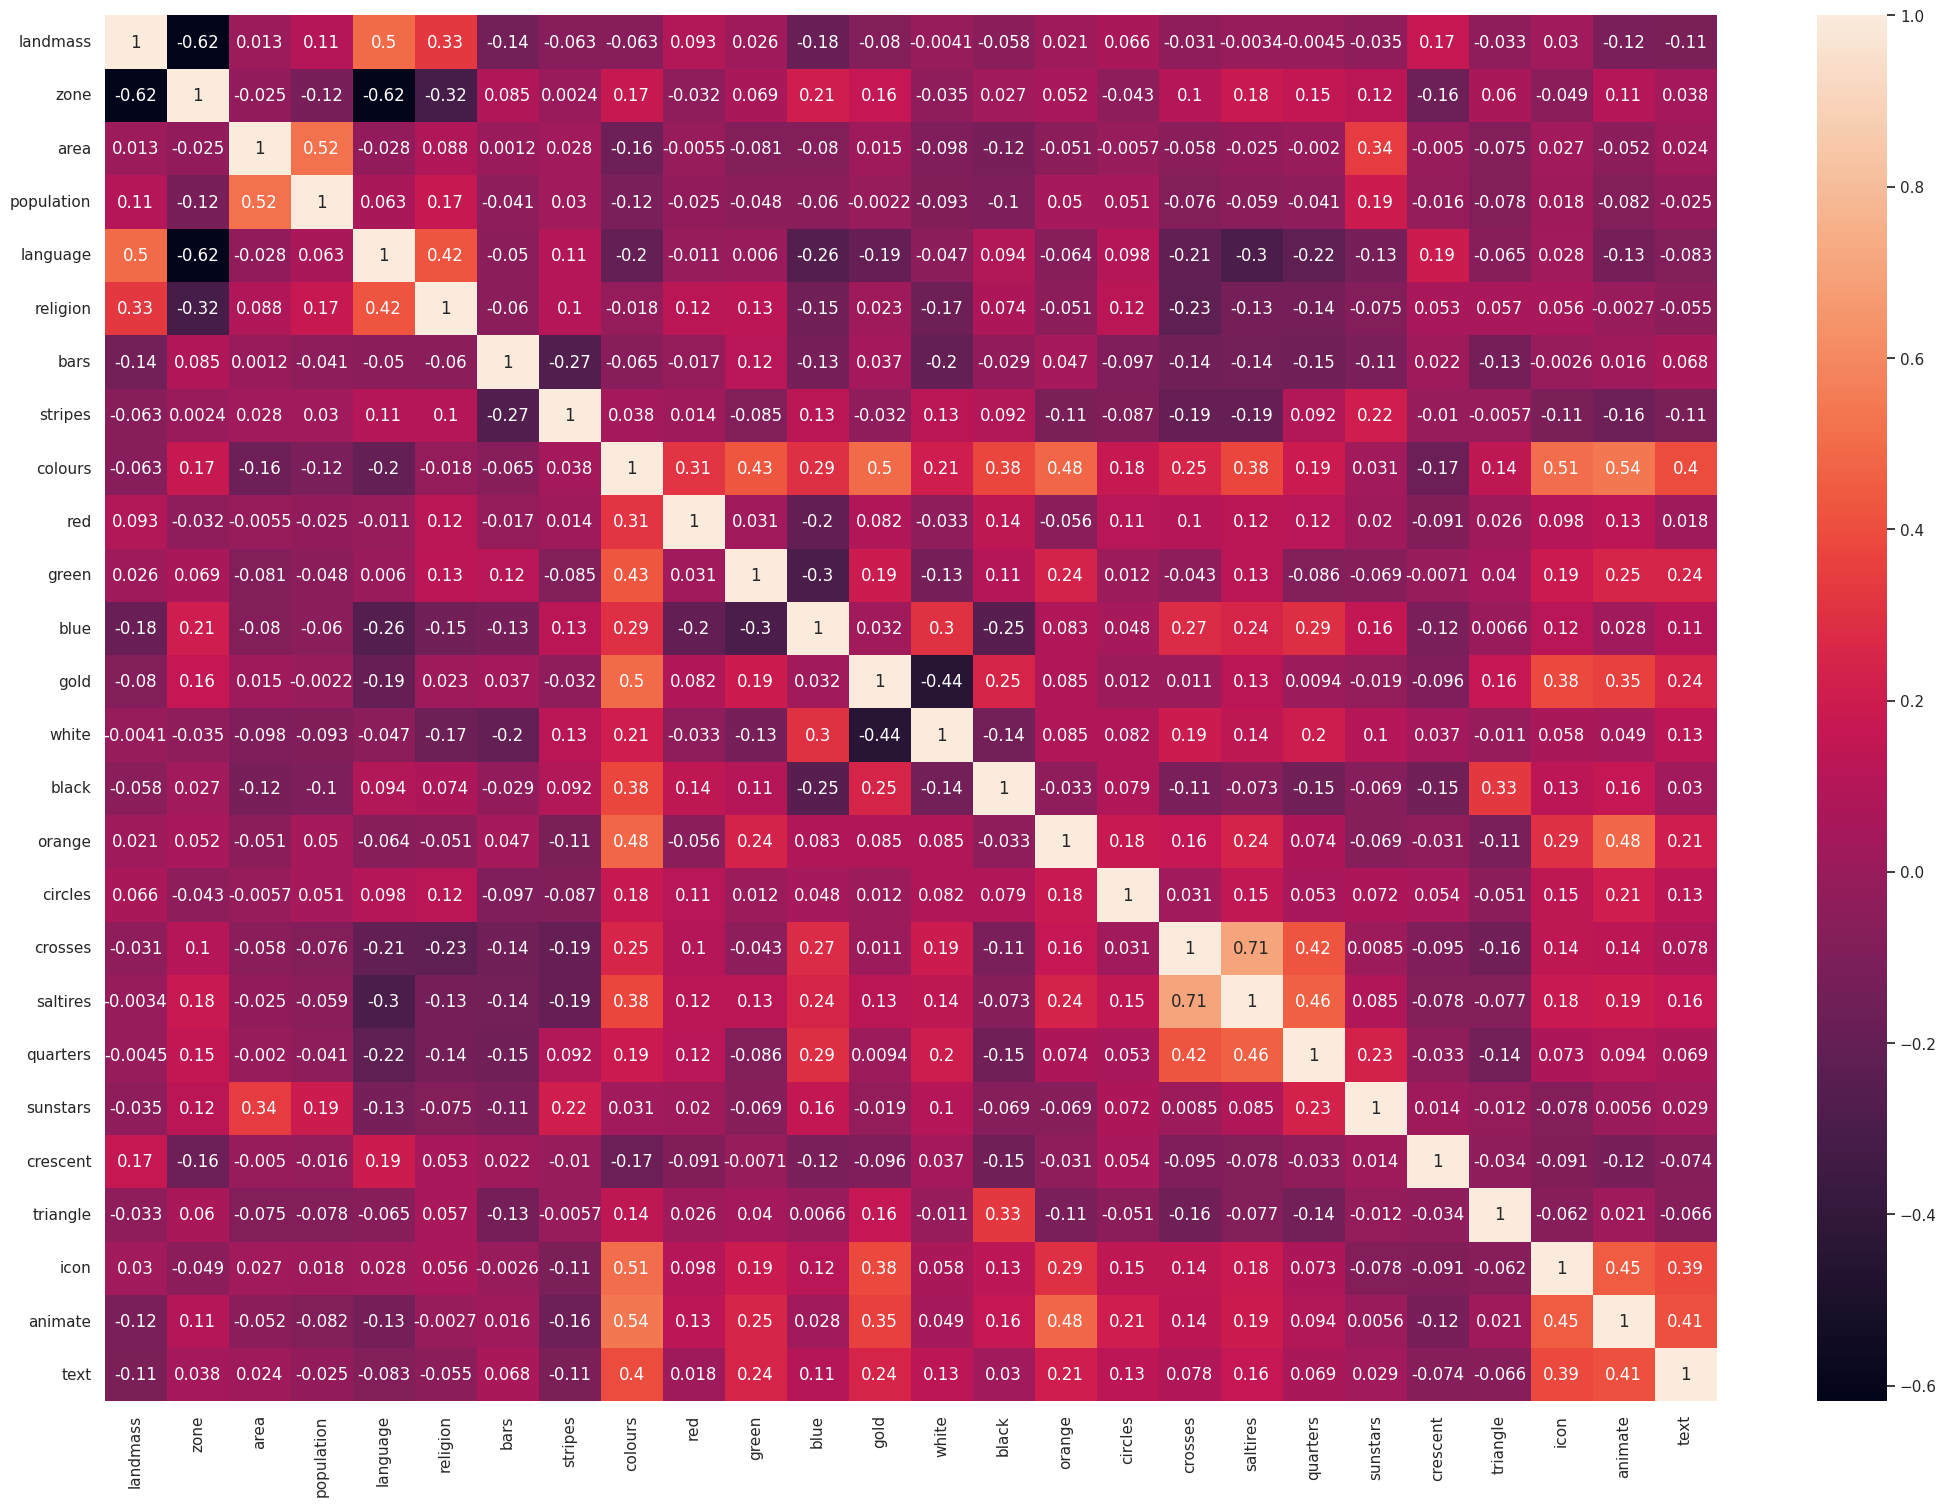

In [ ]:
corr = df.corr()
plt.figure(figsize = (26,18))
sns.heatmap(corr, annot = True)
plt.show()

**4. Сформирую множества признаков и целевых переменных**

In [ ]:
X = pd.concat([df[continuous], df[digital_categorials], pd.get_dummies(df[for_dummies])], axis = 1)
X.head()

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,648,16,0,3,5,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,29,3,0,0,3,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,2388,20,2,0,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,3,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y = df['religion']
y.head()

0    2
1    6
2    2
3    1
4    0
Name: religion, dtype: int64

In [ ]:
y.value_counts()

1    60
0    40
2    36
5    27
6    15
3     8
4     4
7     4
Name: religion, dtype: int64

Вижу, что есть классы, где всего 4 объекта. Это станет проблемой при обучении, т.к. это слишком маленькая выборка, из которой еще и необходимо выделить меньшую по размерам выборку для обучения

**5. Построю baseline модель для получения точки отсчета и дальнейшего повышения качества**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred_basic = lr.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_basic))

              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.69      0.56      0.62        16
           2       0.10      0.50      0.17         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         0

    accuracy                           0.33        39
   macro avg       0.16      0.18      0.15        39
weighted avg       0.36      0.33      0.33        39



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

**Теперь начну процесс улучшения**

Объединю 3,4 и 7 классы, чтобы модель смогла обучиться на этом новом классе

In [ ]:
def union_classes(x):
  if x in [3,4,7]:
    return 3
  elif x == 6:
    return 5
  elif x == 5:
    return 4
  else:
    return x

In [ ]:
df['religion'] = df['religion'].apply(union_classes)

In [ ]:
y = df['religion']

In [ ]:
y.value_counts()

1    60
0    40
2    36
4    27
3    16
5    15
Name: religion, dtype: int64

**6. Обучу модель классификации RandomForest для полученных данных**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
rfc = RandomForestClassifier(max_depth = 20, min_samples_leaf = 5, n_estimators = 100, n_jobs = -1, random_state = 42)

rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.78      0.88      0.82        16
           2       0.33      0.75      0.46         4
           3       1.00      0.33      0.50         3
           4       0.80      0.67      0.73         6
           5       0.00      0.00      0.00         5

    accuracy                           0.67        39
   macro avg       0.60      0.57      0.54        39
weighted avg       0.64      0.67      0.63        39



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**7. Проведу нормализацию признаков**

Поскольку в датасете есть только 2 некатегориальных признака - area и population - нормализую только их

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#X_scaled = MinMaxScaler().fit_transform(X)

In [ ]:
X_scaled_new = MinMaxScaler().fit_transform(X[['area','population']])
X_scaled_new = pd.DataFrame(data = X_scaled_new, columns = X[['area','population']].columns)
X_part = X.drop(columns = ['area','population'])
X_scaled = pd.concat([X_scaled_new, X_part], axis = 1)

In [ ]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled,
                                                                  y,
                                                                  test_size = 0.2,
                                                                  stratify = y,
                                                                  random_state = 42)

In [ ]:
rfc.fit(X_scaled_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [ ]:
y_pred_sc = rfc.predict(X_scaled_test)

In [ ]:
print(classification_report(y_test, y_pred_sc))

              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.67      1.00      0.80        12
           2       0.50      0.71      0.59         7
           3       1.00      0.67      0.80         3
           4       1.00      0.17      0.29         6
           5       1.00      0.33      0.50         3

    accuracy                           0.67        39
   macro avg       0.81      0.58      0.61        39
weighted avg       0.75      0.67      0.63        39



После проведения нормализации результаты на тесте по всем метрикам не изменились. Зато получилось классифицировать все классы с той или иной степенью точности. Пробую дальше.

**8. Попробую сбалансировать классы**

Для этого поэкспериментирую с 2 вещами - сначала передам в модель RandomForest взвешенные классы с помощью compute_class_weights, а затем проведу oversampling

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
class_weights = compute_class_weight('balanced', classes = np.unique(y), y = y)

In [ ]:
class_weights

array([0.80833333, 0.53888889, 0.89814815, 2.02083333, 1.19753086,
       2.15555556])

In [ ]:
rfc_b = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators = 100, n_jobs = -1, random_state = 42, class_weight=dict(enumerate(class_weights)))

In [ ]:
rfc_b.fit(X_scaled_train, y_train)

RandomForestClassifier(class_weight={0: 0.8083333333333333,
                                     1: 0.5388888888888889,
                                     2: 0.8981481481481481,
                                     3: 2.0208333333333335,
                                     4: 1.1975308641975309,
                                     5: 2.1555555555555554},
                       max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [ ]:
y_pred_b = rfc_b.predict(X_scaled_test)
print(classification_report(y_test, y_pred_b))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.83      0.83      0.83        12
           2       0.71      0.71      0.71         7
           3       0.40      0.67      0.50         3
           4       1.00      0.67      0.80         6
           5       0.50      0.33      0.40         3

    accuracy                           0.69        39
   macro avg       0.67      0.64      0.64        39
weighted avg       0.72      0.69      0.70        39



Вижу, что с помощью взвешивания классов метрики пока что наилучшие. Попробую oversampling, а конкретно - метод SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(k_neighbors=5)

X_resampled_train, y_resampled_train = smote.fit_resample(X_scaled_train, y_train)

In [ ]:
y_resampled_train.value_counts()

1    48
4    48
2    48
0    48
5    48
3    48
Name: religion, dtype: int64

Теперь классы полностью сбаалансированы и можно переходить к обучению

In [ ]:
rfc.fit(X_resampled_train, y_resampled_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [ ]:
y_pred_resampled = rfc.predict(X_scaled_test)
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.69      0.75      0.72        12
           2       0.60      0.43      0.50         7
           3       0.67      0.67      0.67         3
           4       0.75      0.50      0.60         6
           5       0.50      0.67      0.57         3

    accuracy                           0.64        39
   macro avg       0.63      0.63      0.62        39
weighted avg       0.65      0.64      0.64        39



Вижу, что oversampling сработал хуже, чем простая балансировка весов, с точки зрения accuracy. Тем не менее, пока что лучшим результатом остается базовый randomforest с отбалансированными весами и нормализованными данными

**9. Теперь отберу признаки**

Сначала посмотрю на важность признаков из модели случайного леса

Чтобы понять, какие признаки надо убрать, добавлю новый случайный признак random_feature

In [ ]:
X_scaled_train_df = pd.DataFrame(data = X_scaled_train, columns=X.columns)

In [ ]:
#X_scaled_train = X_scaled_train.astype('int64')
X_scaled_train_df['RANDOM_FEATURE'] = np.random.random(X_scaled_train.shape[0])

In [ ]:
rfc_b.fit(X_scaled_train_df, y_train)


RandomForestClassifier(class_weight={0: 0.8083333333333333,
                                     1: 0.5388888888888889,
                                     2: 0.8981481481481481,
                                     3: 2.0208333333333335,
                                     4: 1.1975308641975309,
                                     5: 2.1555555555555554},
                       max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [ ]:
rfc_b.feature_importances_

array([0.08622644, 0.07485863, 0.00292755, 0.032206  , 0.03074298,
       0.00603498, 0.01689401, 0.0049637 , 0.00501463, 0.01157969,
       0.00741524, 0.04022358, 0.02476157, 0.02226648, 0.01291166,
       0.0156408 , 0.00476608, 0.00098707, 0.01200236, 0.00621515,
       0.00063373, 0.15544156, 0.1113611 , 0.11187642, 0.        ,
       0.0081374 , 0.        , 0.00054325, 0.01609521, 0.        ,
       0.01190716, 0.00276699, 0.        , 0.00535963, 0.        ,
       0.02089741, 0.        , 0.01112853, 0.00779763, 0.00229966,
       0.00763949, 0.        , 0.        , 0.00941944, 0.        ,
       0.02429266, 0.        , 0.07376413])

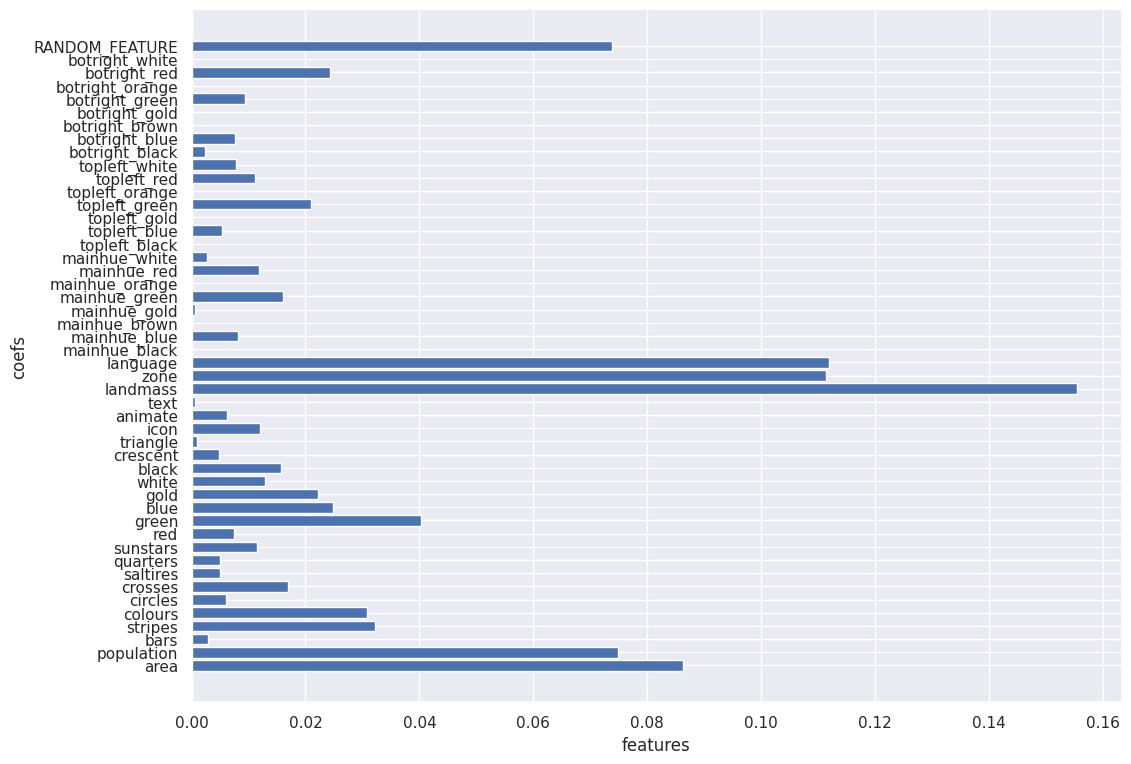

In [ ]:
plt.figure(figsize = (12,9))
plt.barh(np.arange(len(rfc_b.feature_importances_)), rfc_b.feature_importances_)
plt.xlabel('features')
plt.ylabel('coefs')
plt.yticks(np.arange(len(X_scaled_train_df.columns)), X_scaled_train_df.columns);

Сформирую список признаков, чья значимость оказалась выше значимости случайного признака - это population, area, language, zone, landmass

In [ ]:
cols = []
for i in [0,1,21,23]:
  cols.append(X.columns[i])

cols

['area', 'population', 'landmass', 'language']

In [ ]:
cols_upd = cols
cols_upd.append('zone')

In [ ]:
X_scaled_train = pd.DataFrame(data = X_scaled_train, columns = X.columns)
X_scaled_test = pd.DataFrame(data = X_scaled_test, columns = X.columns)

In [ ]:
rfc_b.fit(X_scaled_train[cols_upd], y_train)
y_pred = rfc_b.predict(X_scaled_test[cols_upd])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.70      0.58      0.64        12
           2       0.40      0.57      0.47         7
           3       0.50      0.67      0.57         3
           4       0.50      0.33      0.40         6
           5       0.00      0.00      0.00         3

    accuracy                           0.51        39
   macro avg       0.44      0.46      0.44        39
weighted avg       0.52      0.51      0.51        39



Оказалось, что с полным набором признаков модель показывает лучший accuracy, чем с отобранными. Значит оставлю полный набор, но проверю себя в дальнейшем через параметр max_features в методе для поиска оптимальных метапараметров GridSearch

**10. Теперь подберу оптимальные метапараметры модели**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_estimators':[50, 100, 200, 500],
          'max_depth':[5,10,15,20],
          'min_samples_leaf':[2,3,4,5],
          'random_state':[42],
          'n_jobs':[-1],
          #'class_weight':[dict(enumerate(class_weights))],
          'max_features':[4,5,None]
          }

cv = StratifiedKFold(n_splits = 3)

In [ ]:
X_resampled_train = pd.DataFrame(data = X_resampled_train, columns = X_train.columns)


In [ ]:
y_resampled_train

0      1
1      4
2      2
3      0
4      2
      ..
283    5
284    5
285    5
286    5
287    5
Name: religion, Length: 288, dtype: int64

In [ ]:
rfc_grid = GridSearchCV(RandomForestClassifier(), param_grid = params, verbose = 1, n_jobs = -1, cv = cv)
rfc_grid.fit(X_resampled_train, y_resampled_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [4, 5, None],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 200, 500], 'n_jobs': [-1],
                         'random_state': [42]},
             verbose=1)

In [ ]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=2,
                       n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
rfc_grid.best_score_

0.8402777777777778

In [ ]:
y_pred = rfc_grid.predict(X_scaled_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.73      0.92      0.81        12
           2       0.60      0.43      0.50         7
           3       0.50      0.67      0.57         3
           4       0.75      0.50      0.60         6
           5       1.00      0.33      0.50         3

    accuracy                           0.69        39
   macro avg       0.71      0.62      0.63        39
weighted avg       0.71      0.69      0.67        39



In [ ]:
rfc_grid.best_estimator_.score(X_scaled_test, y_test)

0.6923076923076923

In [ ]:
#------------RandomizedSearchCV--------------------------------------------

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rfc_rand = RandomizedSearchCV(RandomForestClassifier(), params, verbose = 1, n_jobs = -1, cv = cv)
rfc_rand.fit(X_resampled_train, y_resampled_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': [4, 5, None],
                                        'min_samples_leaf': [2, 3, 4, 5],
                                        'n_estimators': [50, 100, 200, 500],
                                        'n_jobs': [-1], 'random_state': [42]},
                   verbose=1)

In [ ]:
rfc_rand.best_estimator_

RandomForestClassifier(max_depth=15, max_features=5, min_samples_leaf=2,
                       n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
rfc_rand.best_score_

0.8333333333333334

In [ ]:
y_pred = rfc_rand.predict(X_scaled_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.73      0.92      0.81        12
           2       0.60      0.43      0.50         7
           3       0.67      0.67      0.67         3
           4       0.75      0.50      0.60         6
           5       0.67      0.67      0.67         3

    accuracy                           0.69        39
   macro avg       0.68      0.65      0.66        39
weighted avg       0.69      0.69      0.68        39



In [ ]:
rfc_rand.best_estimator_.score(X_scaled_test, y_test)

0.6923076923076923

**11. Воспользуюсь бустингом и стэкингом**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

boosting = GradientBoostingClassifier(n_estimators=100,
                                     random_state=42)

In [ ]:
boosting.fit(X_resampled_train, y_resampled_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
boosting.score(X_resampled_train, y_resampled_train)

1.0

In [ ]:
boosting.score(X_scaled_test, y_test)

0.7948717948717948

Попробую найти наиболее оптимальные параметры с помощью GridSearch

In [ ]:
boosting_params = {
    'n_estimators':[100,200,300],
    'min_samples_split':[5,10,15],
    'min_samples_leaf':[2,3,4,5],
    'max_depth':[10,20,30],
    'max_features':[4,5,None],
    'random_state':[42]
}

cv = StratifiedKFold(n_splits = 3)

In [ ]:
boosting_grid = GridSearchCV(GradientBoostingClassifier(), param_grid = boosting_params, verbose = 1, n_jobs = -1, cv = cv)
boosting_grid.fit(X_resampled_train, y_resampled_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': [4, 5, None],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [100, 200, 300],
                         'random_state': [42]},
             verbose=1)

In [ ]:
boosting_grid.best_estimator_

GradientBoostingClassifier(max_depth=10, max_features=5, min_samples_leaf=4,
                           min_samples_split=5, random_state=42)

In [ ]:
boosting_grid.best_score_

0.8680555555555555

In [ ]:
y_pred = boosting_grid.predict(X_scaled_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.85      0.92      0.88        12
           2       0.75      0.43      0.55         7
           3       0.33      0.67      0.44         3
           4       0.67      0.67      0.67         6
           5       1.00      0.33      0.50         3

    accuracy                           0.69        39
   macro avg       0.71      0.63      0.62        39
weighted avg       0.74      0.69      0.69        39



In [ ]:
boosting_grid.best_estimator_.score(X_scaled_test, y_test)

0.6923076923076923

Похоже что изначальные метапараметры отработали лучше, чем с помощью GridSearch, оставлю изначальный бустинг, и попробую xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_resampled_train, y_resampled_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgb.score(X_resampled_train, y_resampled_train)

1.0

In [ ]:
xgb.score(X_scaled_test, y_test)

0.6923076923076923

Получил почти тот же результат, теперь попробую catboost

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cat = CatBoostClassifier(random_state=42)
cat.fit(X_scaled_train, y_train)

Learning rate set to 0.07195
0:	learn: 1.7526670	total: 54.1ms	remaining: 54.1s
1:	learn: 1.6953405	total: 59.6ms	remaining: 29.7s
2:	learn: 1.6575438	total: 64.7ms	remaining: 21.5s
3:	learn: 1.6170367	total: 69.8ms	remaining: 17.4s
4:	learn: 1.5805426	total: 74.7ms	remaining: 14.9s
5:	learn: 1.5455052	total: 79.5ms	remaining: 13.2s
6:	learn: 1.5104086	total: 84.2ms	remaining: 11.9s
7:	learn: 1.4892970	total: 89ms	remaining: 11s
8:	learn: 1.4585673	total: 93.9ms	remaining: 10.3s
9:	learn: 1.4213438	total: 99.3ms	remaining: 9.83s
10:	learn: 1.3973767	total: 104ms	remaining: 9.39s
11:	learn: 1.3589494	total: 110ms	remaining: 9.02s
12:	learn: 1.3320425	total: 115ms	remaining: 8.71s
13:	learn: 1.3090420	total: 120ms	remaining: 8.43s
14:	learn: 1.2885785	total: 124ms	remaining: 8.17s
15:	learn: 1.2723131	total: 126ms	remaining: 7.76s
16:	learn: 1.2459337	total: 136ms	remaining: 7.89s
17:	learn: 1.2257082	total: 142ms	remaining: 7.73s
18:	learn: 1.2107552	total: 147ms	remaining: 7.57s
19:	le

In [ ]:
cat.score(X_resampled_train, y_resampled_train)

0.9201388888888888

In [ ]:
cat.score(X_scaled_test, y_test)

0.6666666666666666

Ну и наконец, попробую стэкинг из логистической регрессии, случайного леса и градиентного бустинга с метапараметрами, подобранными в GridSearch из best_estimator_

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
stacking_cl = StackingClassifier(
    [
        ('LogisticRegression', LogisticRegression()),
        ('RandomForest', RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators = 100, n_jobs = -1, random_state = 42)),
        ('Boosting', GradientBoostingClassifier(max_depth=10, max_features=5, min_samples_leaf=3,
                           n_estimators=50, random_state=42))
    ])

In [ ]:
stacking_cl.fit(X_resampled_train, y_resampled_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                               ('RandomForest',
                                RandomForestClassifier(max_depth=20,
                                                       min_samples_leaf=5,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('Boosting',
                                GradientBoostingClassifier(max_depth=10,
                                                           max_features=5,
                                                           min_samples_leaf=3,
                                                           n_estimators=50,
                                                           random_state=42))])

In [ ]:
print(f'Score on train  {stacking_cl.score(X_resampled_train, y_resampled_train)}')
print(f'Score on test  {stacking_cl.score(X_scaled_test, y_test)}')

Score on train  1.0
Score on test  0.6923076923076923


In [ ]:
for i in stacking_cl.named_estimators:
    print(f'Score on train  with model {i} {stacking_cl.named_estimators_[i].score(X_resampled_train, y_resampled_train)}')
    print(f'Score on test  with model {i} {stacking_cl.named_estimators_[i].score(X_scaled_test, y_test)}')

Score on train  with model LogisticRegression 0.8298611111111112
Score on test  with model LogisticRegression 0.5384615384615384
Score on train  with model RandomForest 0.8819444444444444
Score on test  with model RandomForest 0.6410256410256411
Score on train  with model Boosting 1.0
Score on test  with model Boosting 0.6923076923076923


**ИТОГИ**

---



**Стартовая точка - базовая логистическая регрессия на необработанных данных со значением accuracy 0.33**

In [ ]:
print(classification_report(y_test, y_pred_basic))

              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.69      0.56      0.62        16
           2       0.10      0.50      0.17         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         0

    accuracy                           0.33        39
   macro avg       0.16      0.18      0.15        39
weighted avg       0.36      0.33      0.33        39



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

**Промежуточный итог - RandomForest с различными метапараметрами модели, 2 из 3 бустингов и финальный стэкинг с одинаковым значением accuracy 0.69**

RandomForest на нормализованных данных с отбалансированными классами и вручную подобранными другими метапараметрами

In [ ]:
rfc_b.fit(X_scaled_train, y_train)

RandomForestClassifier(class_weight={0: 0.8083333333333333,
                                     1: 0.5388888888888889,
                                     2: 0.8981481481481481,
                                     3: 2.0208333333333335,
                                     4: 1.1975308641975309,
                                     5: 2.1555555555555554},
                       max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [ ]:
y_pred_b = rfc_b.predict(X_scaled_test)
print(classification_report(y_test, y_pred_b))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.83      0.83      0.83        12
           2       0.71      0.71      0.71         7
           3       0.40      0.67      0.50         3
           4       1.00      0.67      0.80         6
           5       0.50      0.33      0.40         3

    accuracy                           0.69        39
   macro avg       0.67      0.64      0.64        39
weighted avg       0.72      0.69      0.70        39



RandomForest с подобранными в GridSearch метапараметрами

In [ ]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=2,
                       n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.73      0.92      0.81        12
           2       0.60      0.43      0.50         7
           3       0.50      0.67      0.57         3
           4       0.75      0.50      0.60         6
           5       1.00      0.33      0.50         3

    accuracy                           0.69        39
   macro avg       0.71      0.62      0.63        39
weighted avg       0.71      0.69      0.67        39



XGboost

In [ ]:
xgb.score(X_scaled_test, y_test)

0.6923076923076923

**Итоговый результат**

Наилучшее качество показала модель градиентного бустинга на нормализованных данных с объединенными в один малочисленными классами после oversampling'а с помощью метода SMOTE

In [ ]:
boosting.score(X_scaled_test, y_test)

0.7948717948717948

**11. Выводы**

---



Была решена задача многоклассовой классификации с использованием различных методов оптимизации данных и параметров модели. Удалось поднять метрику accuracy с 0.33 для baseline модели логистической регрессии сначала до 0.69 с использованием модели RandomForest, нормализации данных и объединении малочисленных классов, а затем до 0.79 дополнительно с помощью oversampling'а данных и модели градиентного бустинга.

К сожалению, методы поиска оптимальных параметров модели GridSearch и RandomizedSearch не дали ощутимого прироста в качестве, как и отбор наиболее важных признаков из общего числа признаков. Возможно, при продолжении экспериментов с GridSearch и увеличении размеров сетки признаков качество стало бы лучше, но это потребует большего времени и ресурсов моей машины, возможно, значительно больше при незначительном улучшении итогового качества.